In [1]:
# Developing a Convolutional Neural Network to classify images based on the CIFAR-10 Dataset

# Step 1 - Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow

In [3]:
# import the cifar-10 dataset
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# see the shape of the actual dataset
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

# Step 2 - Visualize Data

[7]


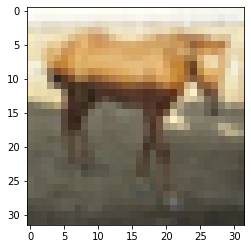

In [8]:
i = 2000
plt.imshow(X_train[i])
print(y_train[i])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


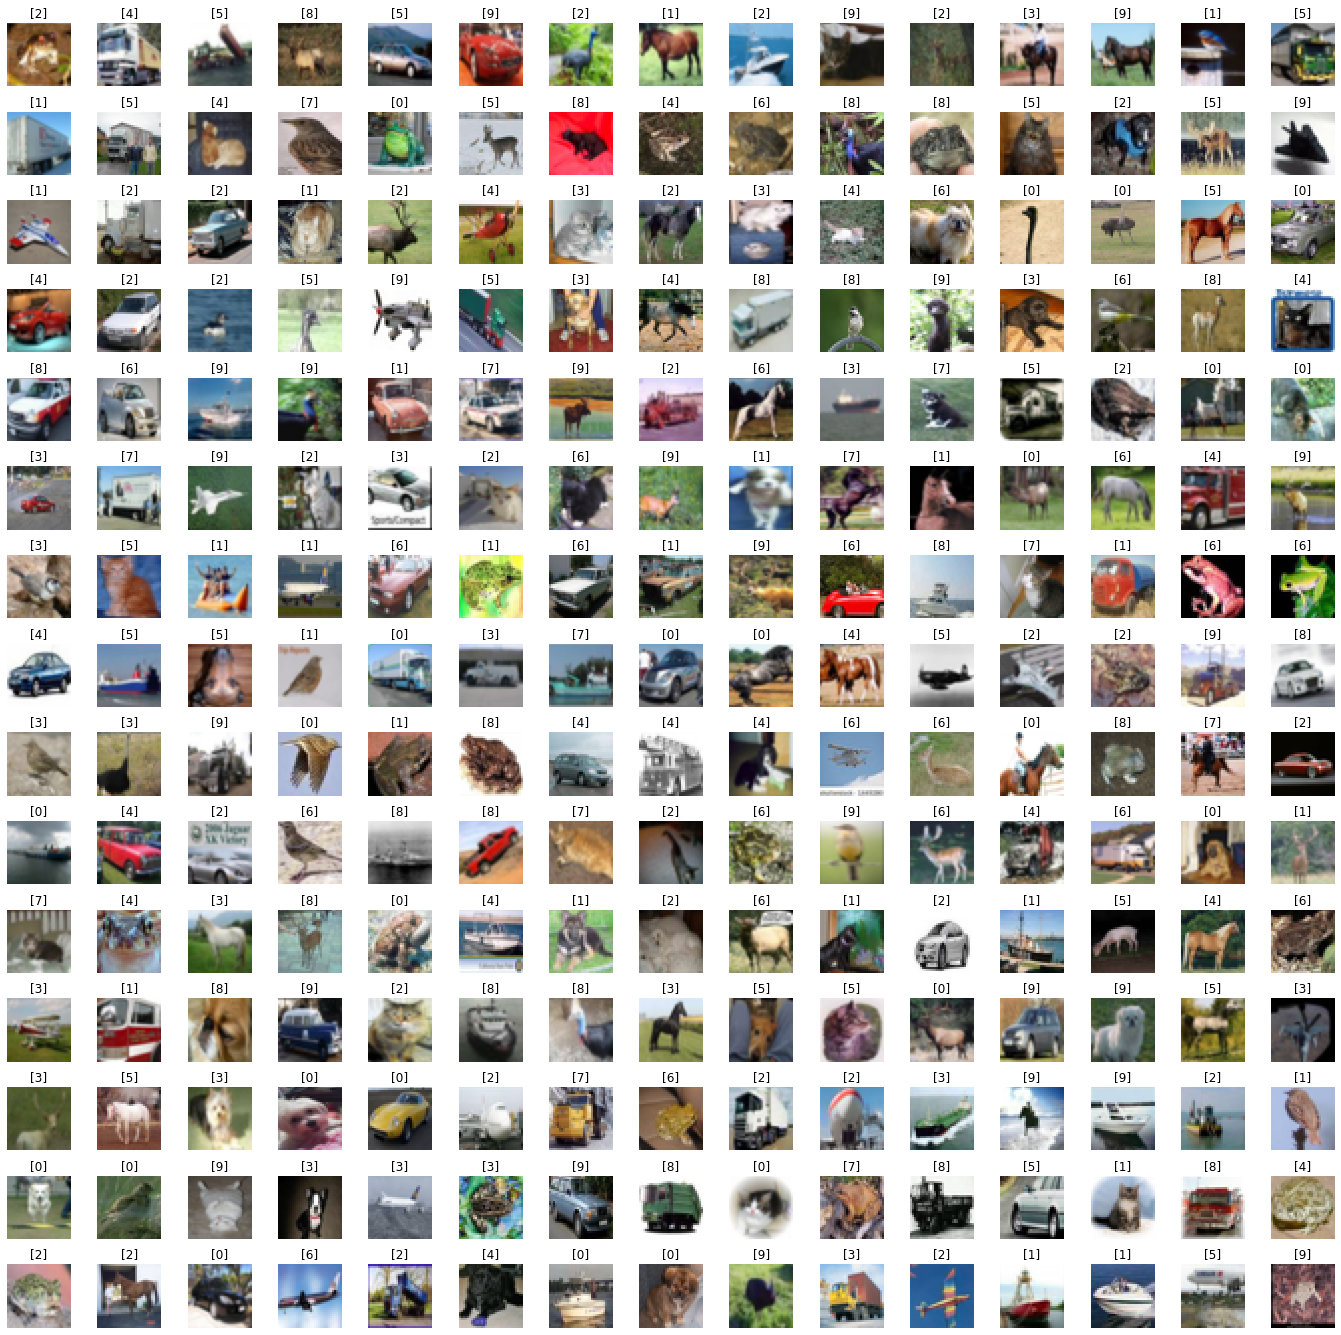

In [9]:
# create a grid of  15*15 images

W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (24, 24))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, (L_grid * W_grid)):
    index = np.random.randint(0 , n_training) # pick a random number
    axes[i].imshow(X_train[i])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = .4)

In [10]:
n_training

50000

# Step 3 - Data Preparation

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
number_cat = 10

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
type(y_train)

numpy.ndarray

In [15]:
y_train = tensorflow.keras.utils.to_categorical(y_train, number_cat)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [18]:
y_test = tensorflow.keras.utils.to_categorical(y_test, number_cat)

In [19]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [20]:
# performing data normalization
X_train = X_train / 255
X_test = X_test / 255

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
Input_shape = X_train.shape[1:]

In [23]:
Input_shape

(32, 32, 3)

# Step 4 - Train the Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [25]:
# Build the Convolutional Neural Network

cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

### Step 4 - Part 2

In [26]:
cnn_model.compile(loss = 'categorical_crossentropy', 
                  optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate = 0.001), 
                  metrics = ['accuracy'])

In [27]:
# I'm using just 2 epochs because of my laptop (no GPUs)
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 [==============================] - 88s 56ms/step - loss: 1.5515 - accuracy: 0.4355
Epoch 2/2
1563/1563 [==============================] - 93s 59ms/step - loss: 1.1601 - accuracy: 0.5944


# Step 5 - Evaluate the Model

In [28]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 4s 11ms/step - loss: 1.1068 - accuracy: 0.6082
Test Accuracy: 0.6082000136375427


In [29]:
predicted_classes = np.argmax(cnn_model.predict(X_test), axis = -1)
predicted_classes

array([3, 8, 8, ..., 2, 1, 7], dtype=int64)

In [30]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [31]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

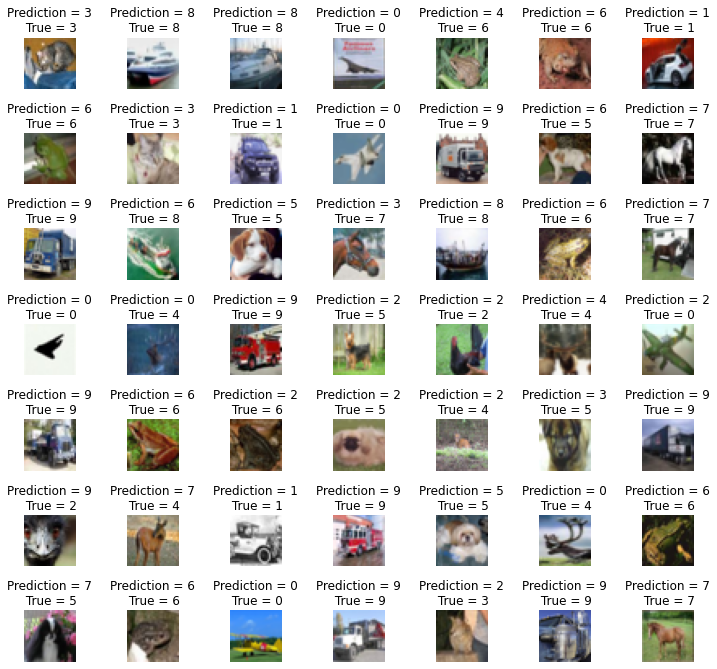

In [32]:
W = 7
L = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, (L * W)):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)

<AxesSubplot:>

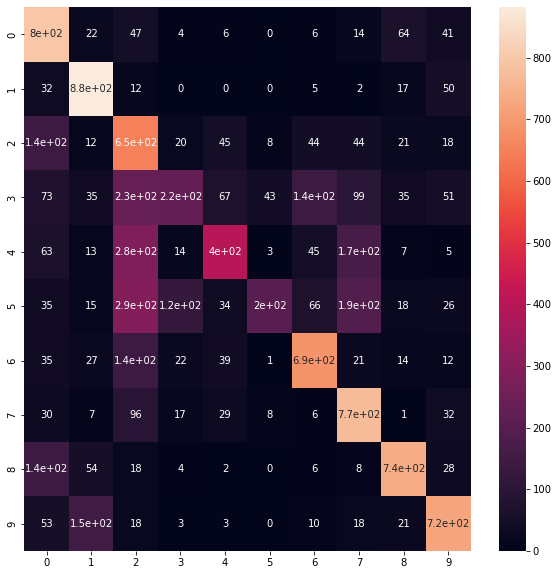

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sbn.heatmap(cm, annot = True)

# Step 6 - Saving the Model

In [34]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# Step 7 - Model Training using the Augmented Dataset

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
datagen = ImageDataGenerator(rotation_range = 90, 
                             horizontal_flip = True, 
                             vertical_flip = True)

In [37]:
datagen.fit(X_train)

In [41]:
cnn_model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 1)

1563/1563 [==============================] - 82s 52ms/step - loss: 1.5603 - accuracy: 0.4454


In [42]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
    
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmented.h5')
cnn_model.save(model_path)